# Question 1: Travel Data Analysis

We merge monthly passenger movement data (January 1990 - April 2004) in USA. Simple graphs are plotted and we compare travel patterns between automobile, train and air travel.

## 1. Load Required Libraries

In [2]:
# Install xlrd for reading Excel files
%pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

## 2. Load Data

In [4]:
# Load the three travel datasets
df_auto = pd.read_csv('Data/Travel Data/Auto_vehicle_miles_traveled_USA.csv')
df_train = pd.read_csv('Data/Travel Data/TrainTravel_USA.csv')
df_air = pd.read_excel('Data/Travel Data/AirTravel_USA.xls')

print("Auto Travel Data:")
print(df_auto.head())
print("\nTrain Travel Data:")
print(df_train.head())
print("\nAir Travel Data:")
print(df_air.head())

Auto Travel Data:
    Month  VMT (billions)
0  Jan-90          163.28
1  Feb-90          153.25
2  Mar-90          178.42
3  Apr-90          178.68
4  May-90          188.88

Train Travel Data:
   Month  Year    Rail PM
0      1  1990  454115779
1      2  1990  435086002
2      3  1990  568289732
3      4  1990  568101697
4      5  1990  539628385

Air Travel Data:
   Month  Year  Air RPM (000s)
0      1  1990        35153577
1      2  1990        32965187
2      3  1990        39993913
3      4  1990        37981886
4      5  1990        38419672


## 3. Clean and Prepare Data

In [11]:
# Convert Month column in auto data to datetime
df_auto['Date'] = pd.to_datetime(df_auto['Month'], format='%b-%y')

# Create Date column for train and air data
df_train['Date'] = pd.to_datetime(df_train['Year'].astype(str) + '-' + df_train['Month'].astype(str) + '-01')
df_air['Date'] = pd.to_datetime(df_air['Year'].astype(str) + '-' + df_air['Month'].astype(str) + '-01')

# Select relevant columns
df_auto = df_auto[['Date', 'VMT (billions)']].rename(columns={'VMT (billions)': 'Automobile'})
df_train = df_train[['Date', 'Rail PM']].rename(columns={'Rail PM': 'Train'})
df_air = df_air[['Date', 'Air RPM (000s)']].rename(columns={'Air RPM (000s)': 'Air'})

print("Cleaned data:")
print(df_auto.head())
print(df_train.head())
print(df_air.head())

KeyError: 'Month'

## 4. Merge Datasets

**Tidy Data Principle**: Merging on Date creates a single dataset where each observation (month) is in one row with all related variables (transport modes) as columns.

In [19]:
# Merge all three datasets
df = df_auto.merge(df_train, on='Date').merge(df_air, on='Date')
#pd.DataFrame(df).to_csv("Travel_tidy.csv", index=False)
print(f"Merged dataset shape: {df.shape}")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())

Merged dataset shape: (172, 4)
        Date  Automobile      Train       Air
0 1990-01-01      163.28  454115779  35153577
1 1990-02-01      153.25  435086002  32965187
2 1990-03-01      178.42  568289732  39993913
3 1990-04-01      178.68  568101697  37981886
4 1990-05-01      188.88  539628385  38419672

Missing values:
Date          0
Automobile    0
Train         0
Air           0
dtype: int64


## 5. Visualize Travel Patterns

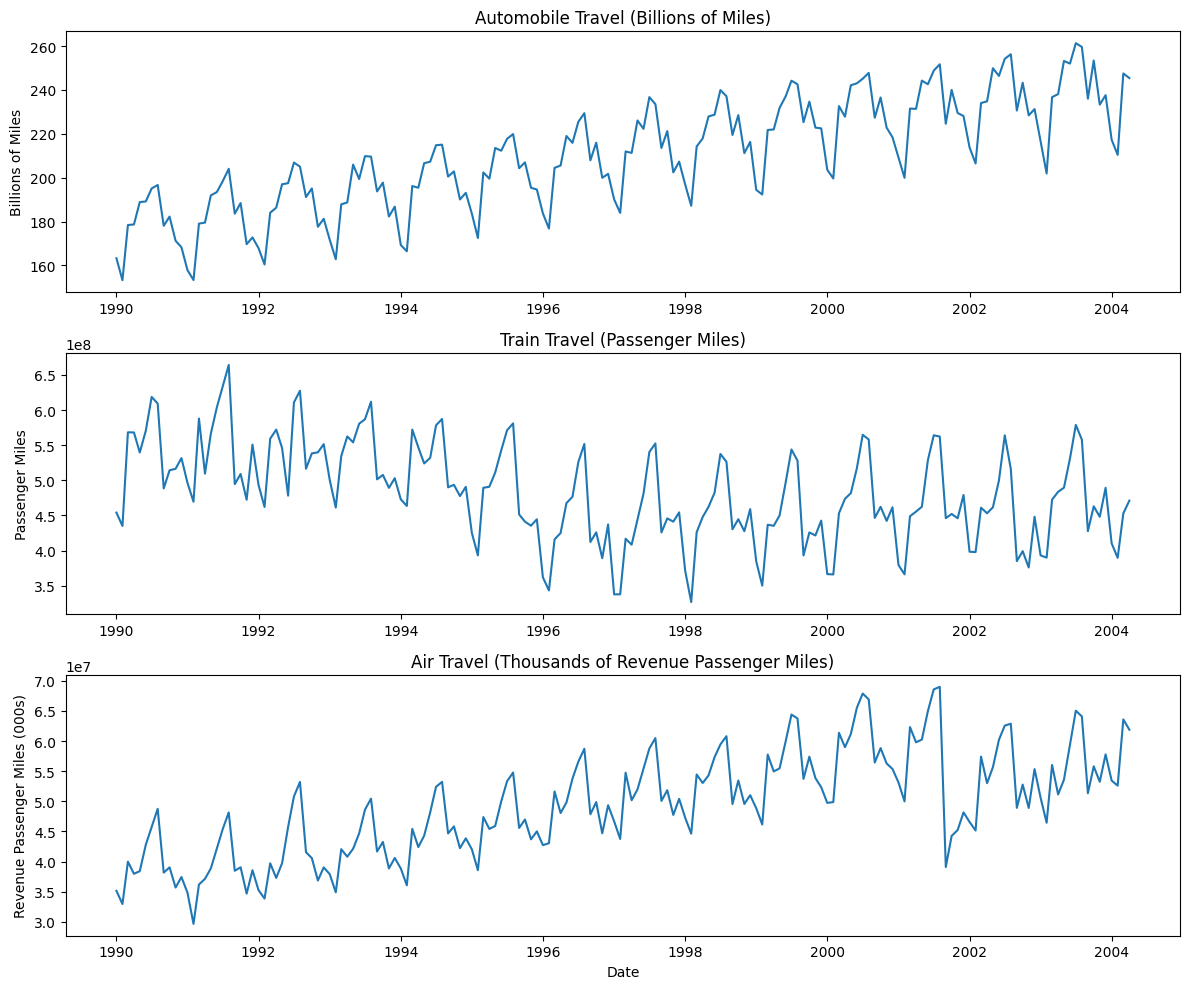

In [22]:
# Plot individual time series
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(df['Date'], df['Automobile'])
axes[0].set_title('Automobile Travel (Billions of Miles)')
axes[0].set_ylabel('Billions of Miles')

axes[1].plot(df['Date'], df['Train'])
axes[1].set_title('Train Travel (Passenger Miles)')
axes[1].set_ylabel('Passenger Miles')

axes[2].plot(df['Date'], df['Air'])
axes[2].set_title('Air Travel (Thousands of Revenue Passenger Miles)')
axes[2].set_ylabel('Revenue Passenger Miles (000s)')
axes[2].set_xlabel('Date')

plt.tight_layout()
plt.show()

## 6. September 11, 2001 Analysis

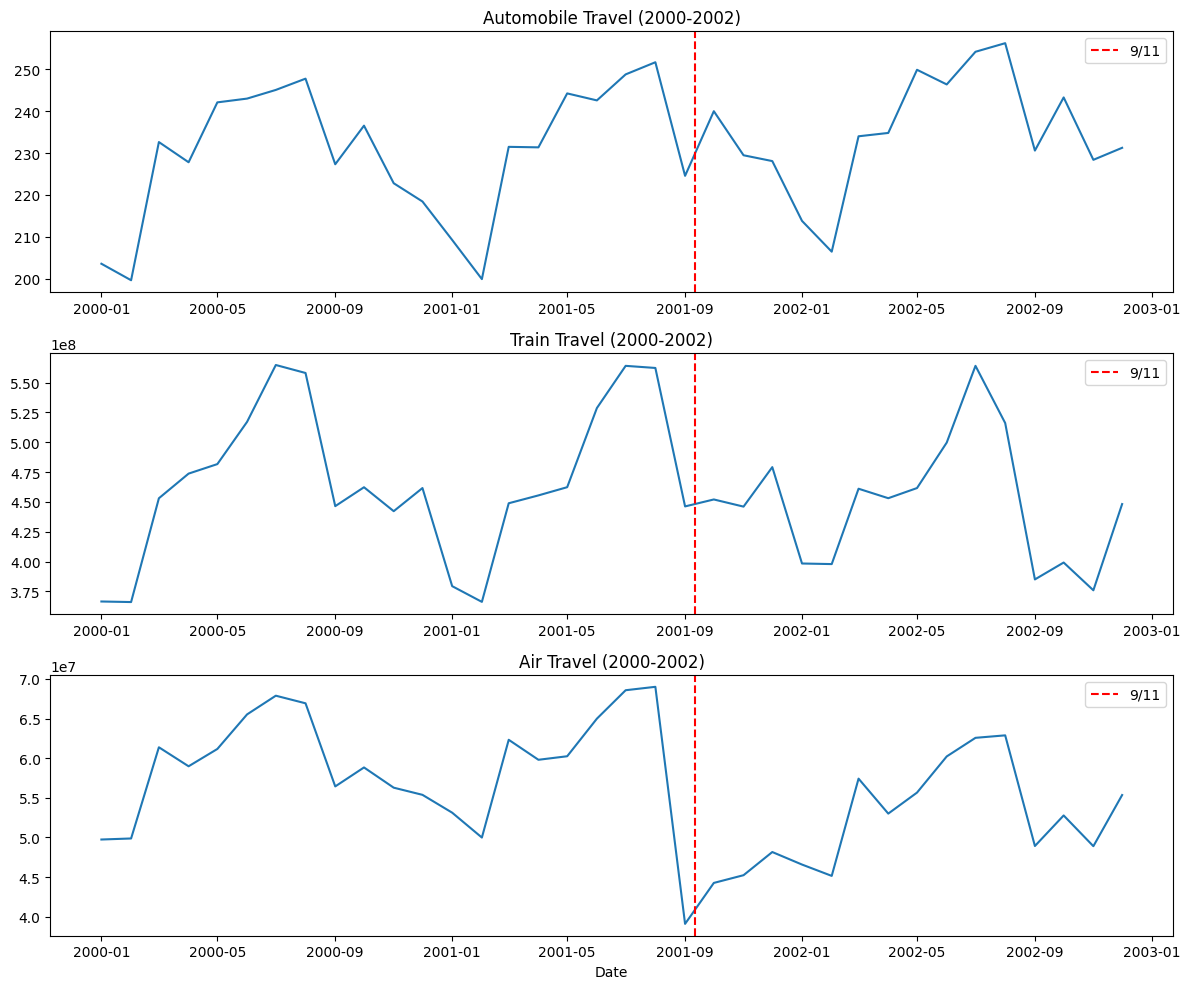

In [23]:
# Filter data around 9/11 (2000-2002)
df_filtered = df[(df['Date'] >= '2000-01-01') & (df['Date'] <= '2002-12-31')]
sept_11 = pd.to_datetime('2001-09-11')

# Plot with 9/11 marker
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(df_filtered['Date'], df_filtered['Automobile'])
axes[0].axvline(sept_11, color='red', linestyle='--', label='9/11')
axes[0].set_title('Automobile Travel (2000-2002)')
axes[0].legend()

axes[1].plot(df_filtered['Date'], df_filtered['Train'])
axes[1].axvline(sept_11, color='red', linestyle='--', label='9/11')
axes[1].set_title('Train Travel (2000-2002)')
axes[1].legend()

axes[2].plot(df_filtered['Date'], df_filtered['Air'])
axes[2].axvline(sept_11, color='red', linestyle='--', label='9/11')
axes[2].set_title('Air Travel (2000-2002)')
axes[2].set_xlabel('Date')
axes[2].legend()

plt.tight_layout()
plt.show()